# **Step 01: Clone the YOLOv9 Github Repo**


In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 781 (delta 280), reused 277 (delta 228), pack-reused 374 (from 1)
Receiving objects: 100% (781/781), 3.30 MiB | 27.91 MiB/s, done.
Resolving deltas: 100% (325/325), done.


# **Step 02: Change Current Directory**
now we are in the yolov9 folder

In [ ]:
%cd yolov9

/content/yolov9


# **Step 03: Install All the Required Packages**
using the following command we install the all the required packages into the scripte

In [ ]:
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 95.4 kB/s eta 0:00:00


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


# **Steo 04: Download the Model Weights**
**NOTE:** Now download the yolov9 pretrained model to the newly created weights folder, here download weights onle yolov9-c.pt and yolov9-e.pt

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [ ]:
!ls -la {HOME}/weights

total 237676
drwxr-xr-x  2 root root      4096 Aug 15 05:01 .
drwxr-xr-x 13 root root      4096 Aug 15 05:00 ..
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


# **Step 05: Download the Dataset from Roboflow**
Using the roboflow dataset site it provide the below command for load the data to folder

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hbb1TNmkIXBQwpNChqVO")
project = rf.workspace("brad-dwyer").project("pothole-voxrl")
version = project.version(1)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-1 in yolov9:: 100%|██████████| 1342/1342 [00:00<00:00, 3689.64it/s]


# **Step 06: Train Custom Model**

In [ ]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data 'Pothole-1/data.yaml' --img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 30 --close-mosaic 15


2024-08-15 05:06:21.232391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 05:06:21.493391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 05:06:21.563910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 05:06:21.779612: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 05:06:23.036115: W tensorflow/comp

Trained weight is saved in the runs/train/yolov9-e-finetuning folder

In [ ]:
!ls {HOME}/runs/train/yolov9-e-finetuning/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1723698384.a4f62302ea7e.3244.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


# **Step 07: Examine Training Results**
**NOTE:** By default, the results of each subsequent training session are saved in {HOME}/yolov9/runs/trains/, folder

In [ ]:
from IPython.display import Image

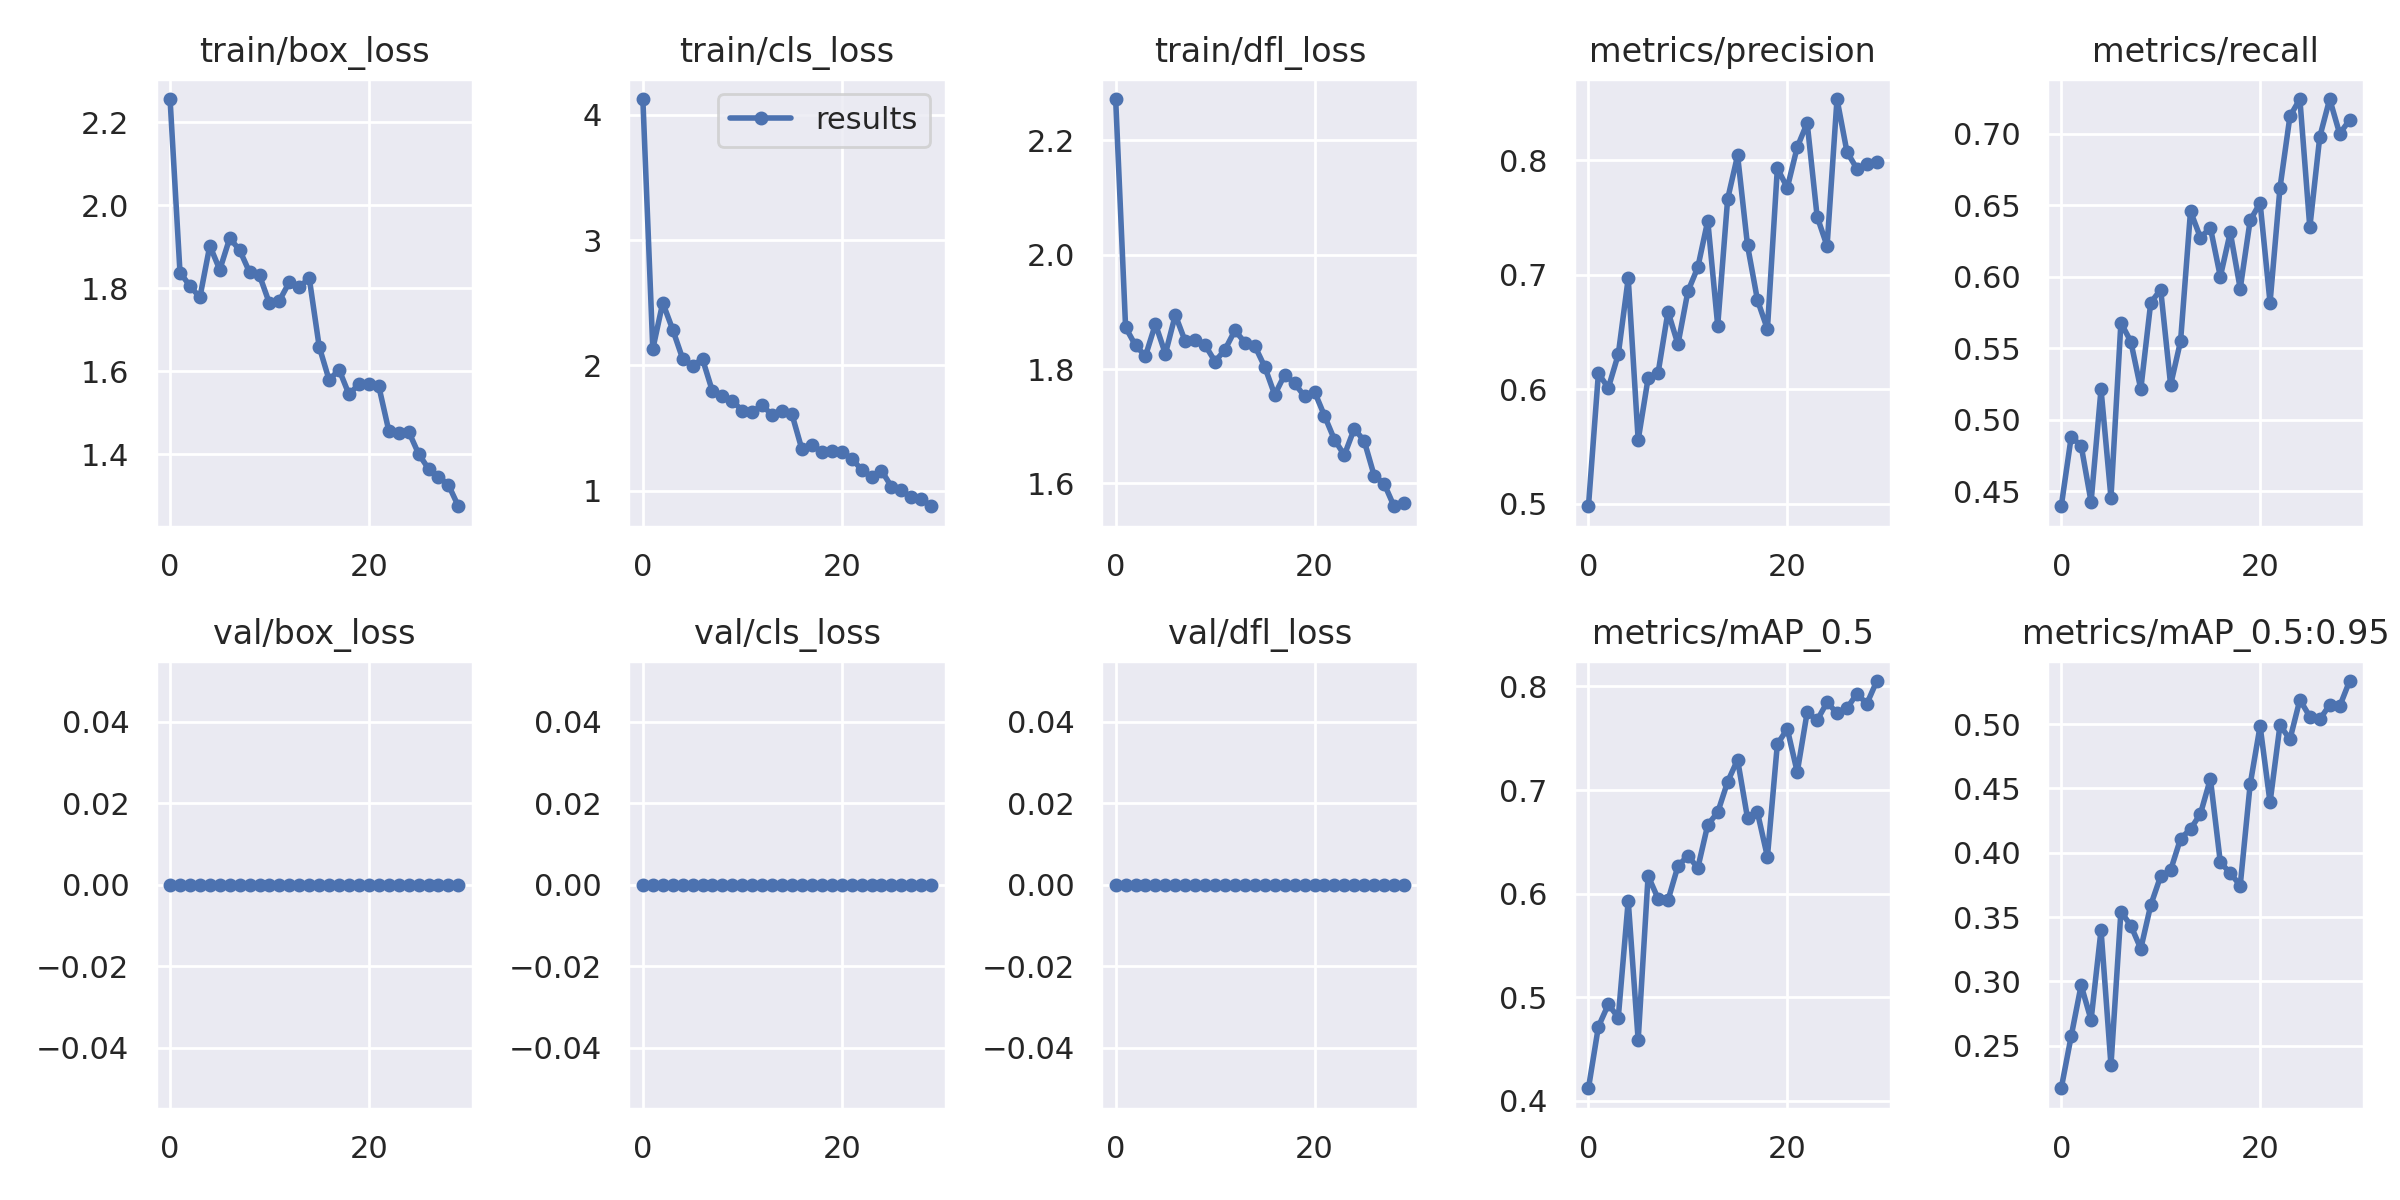

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/results.png", width=1000)

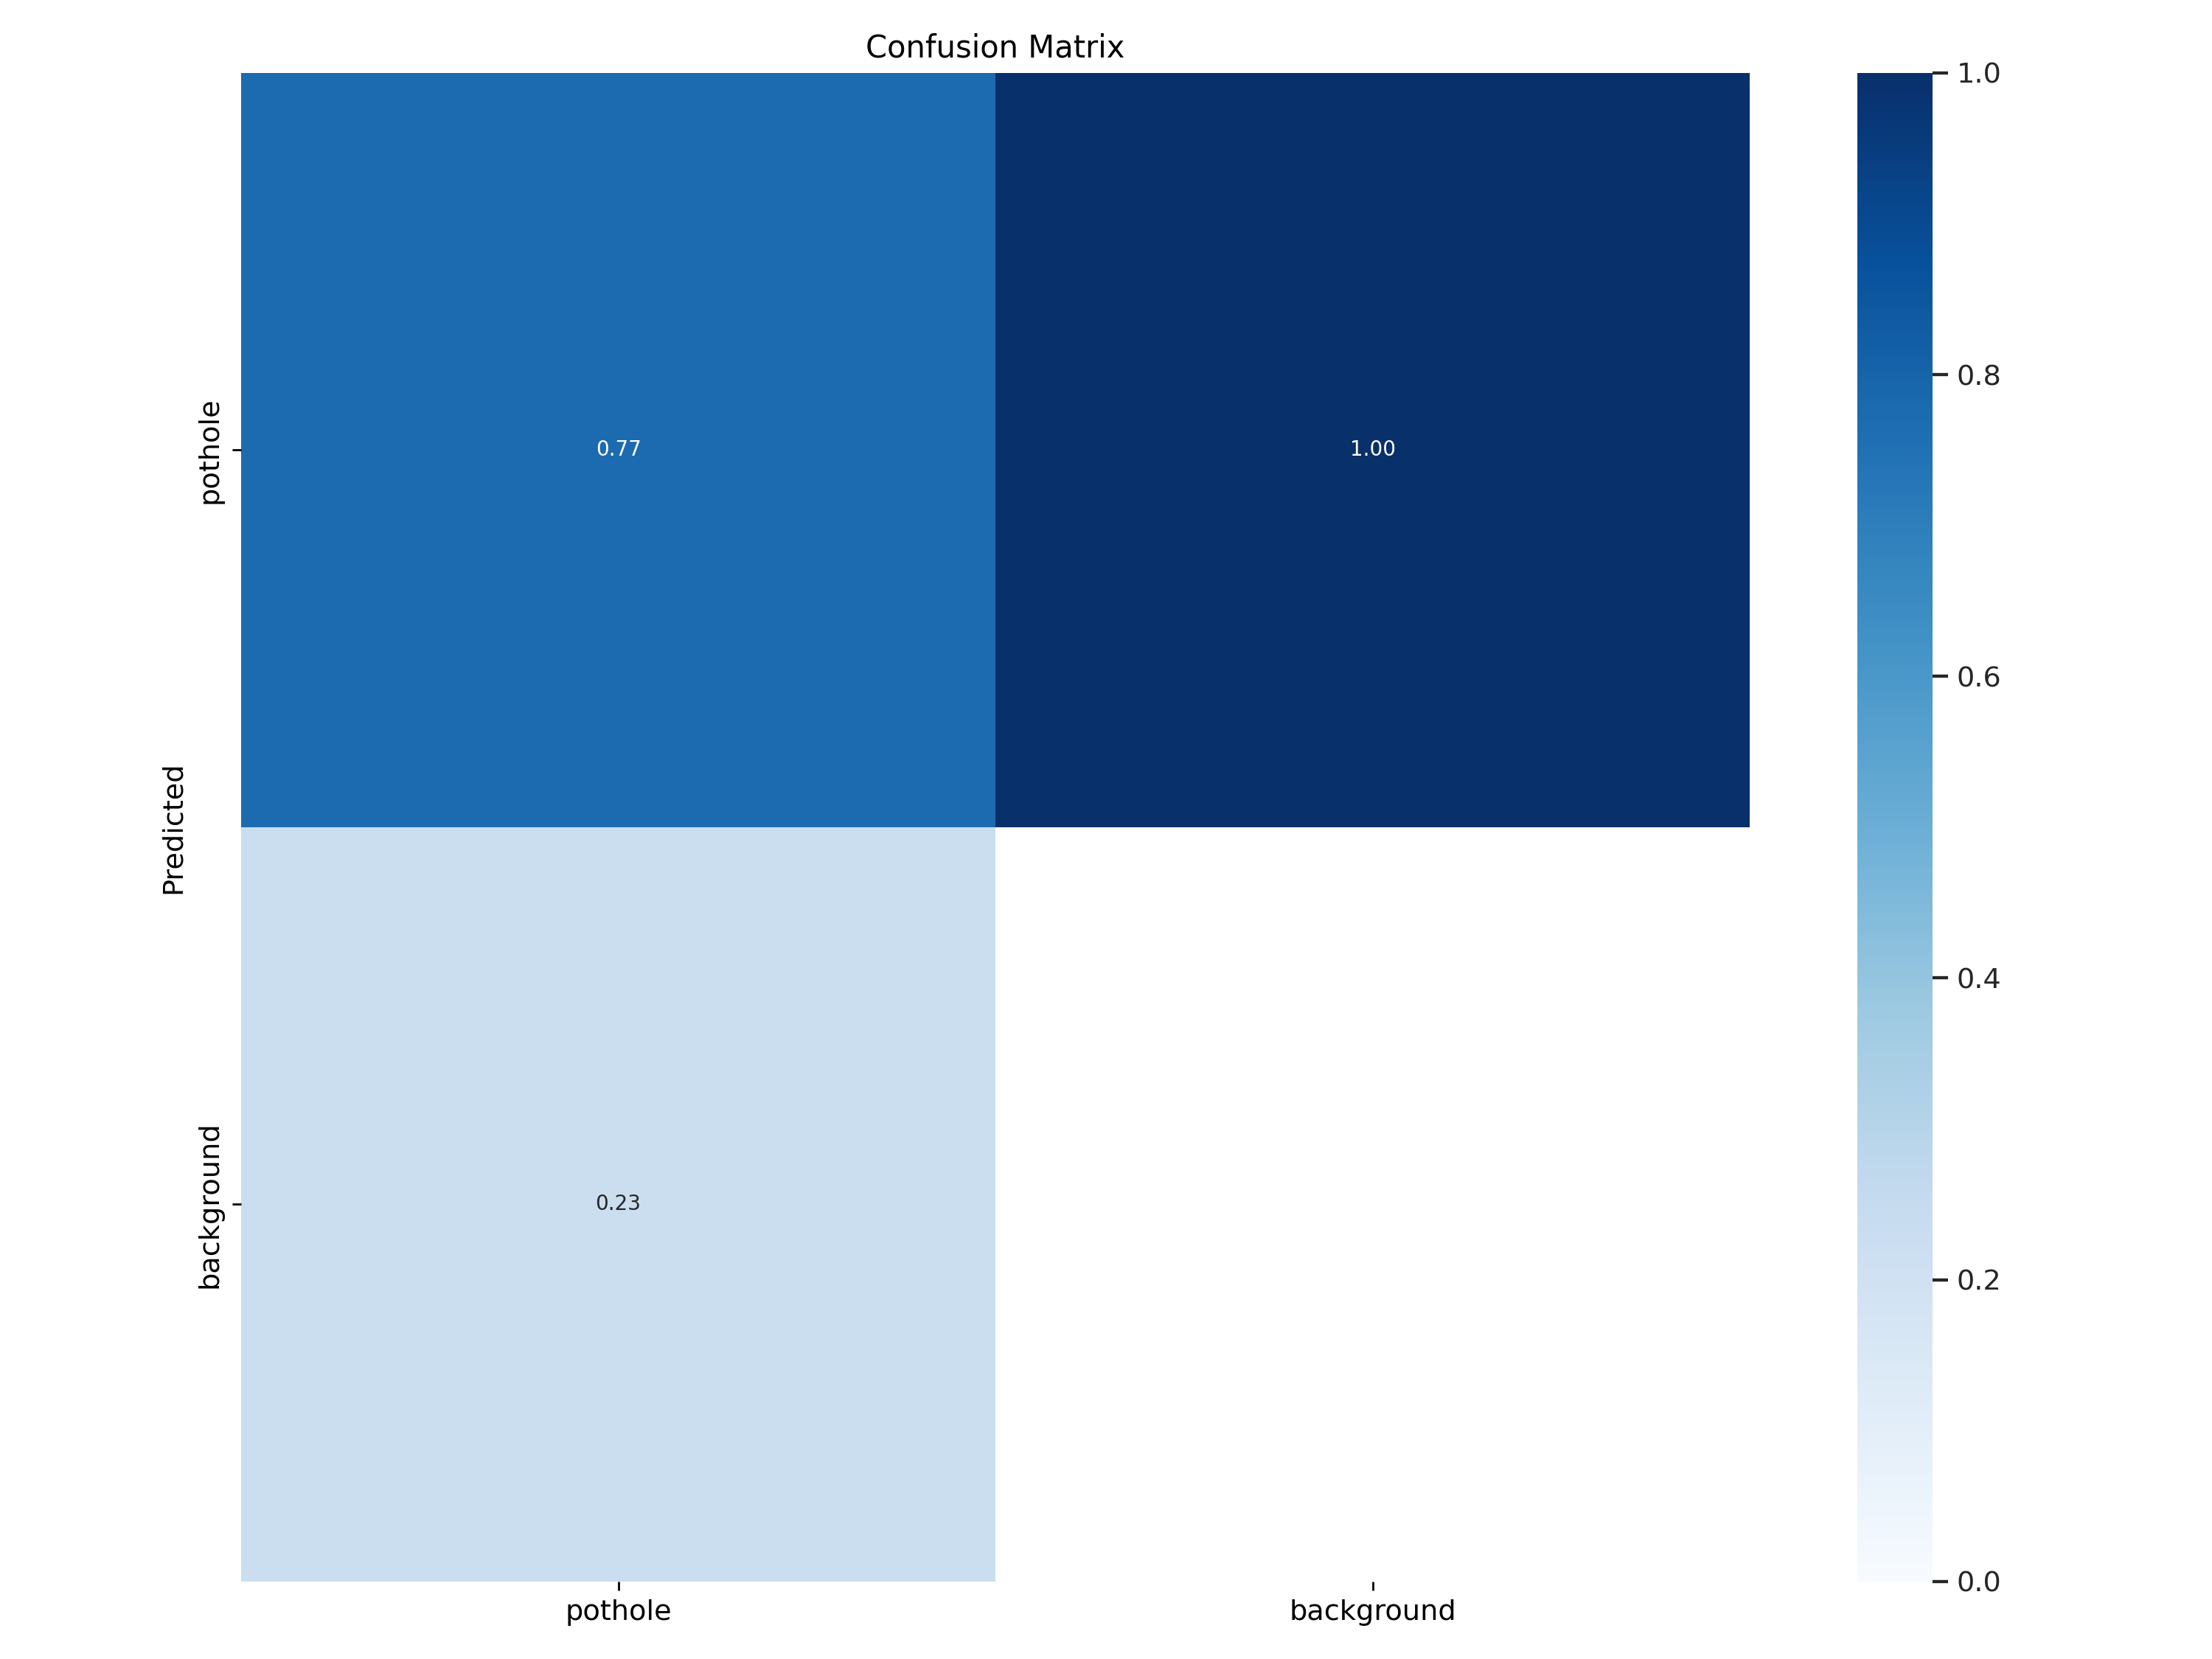

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/confusion_matrix.png", width=1000)

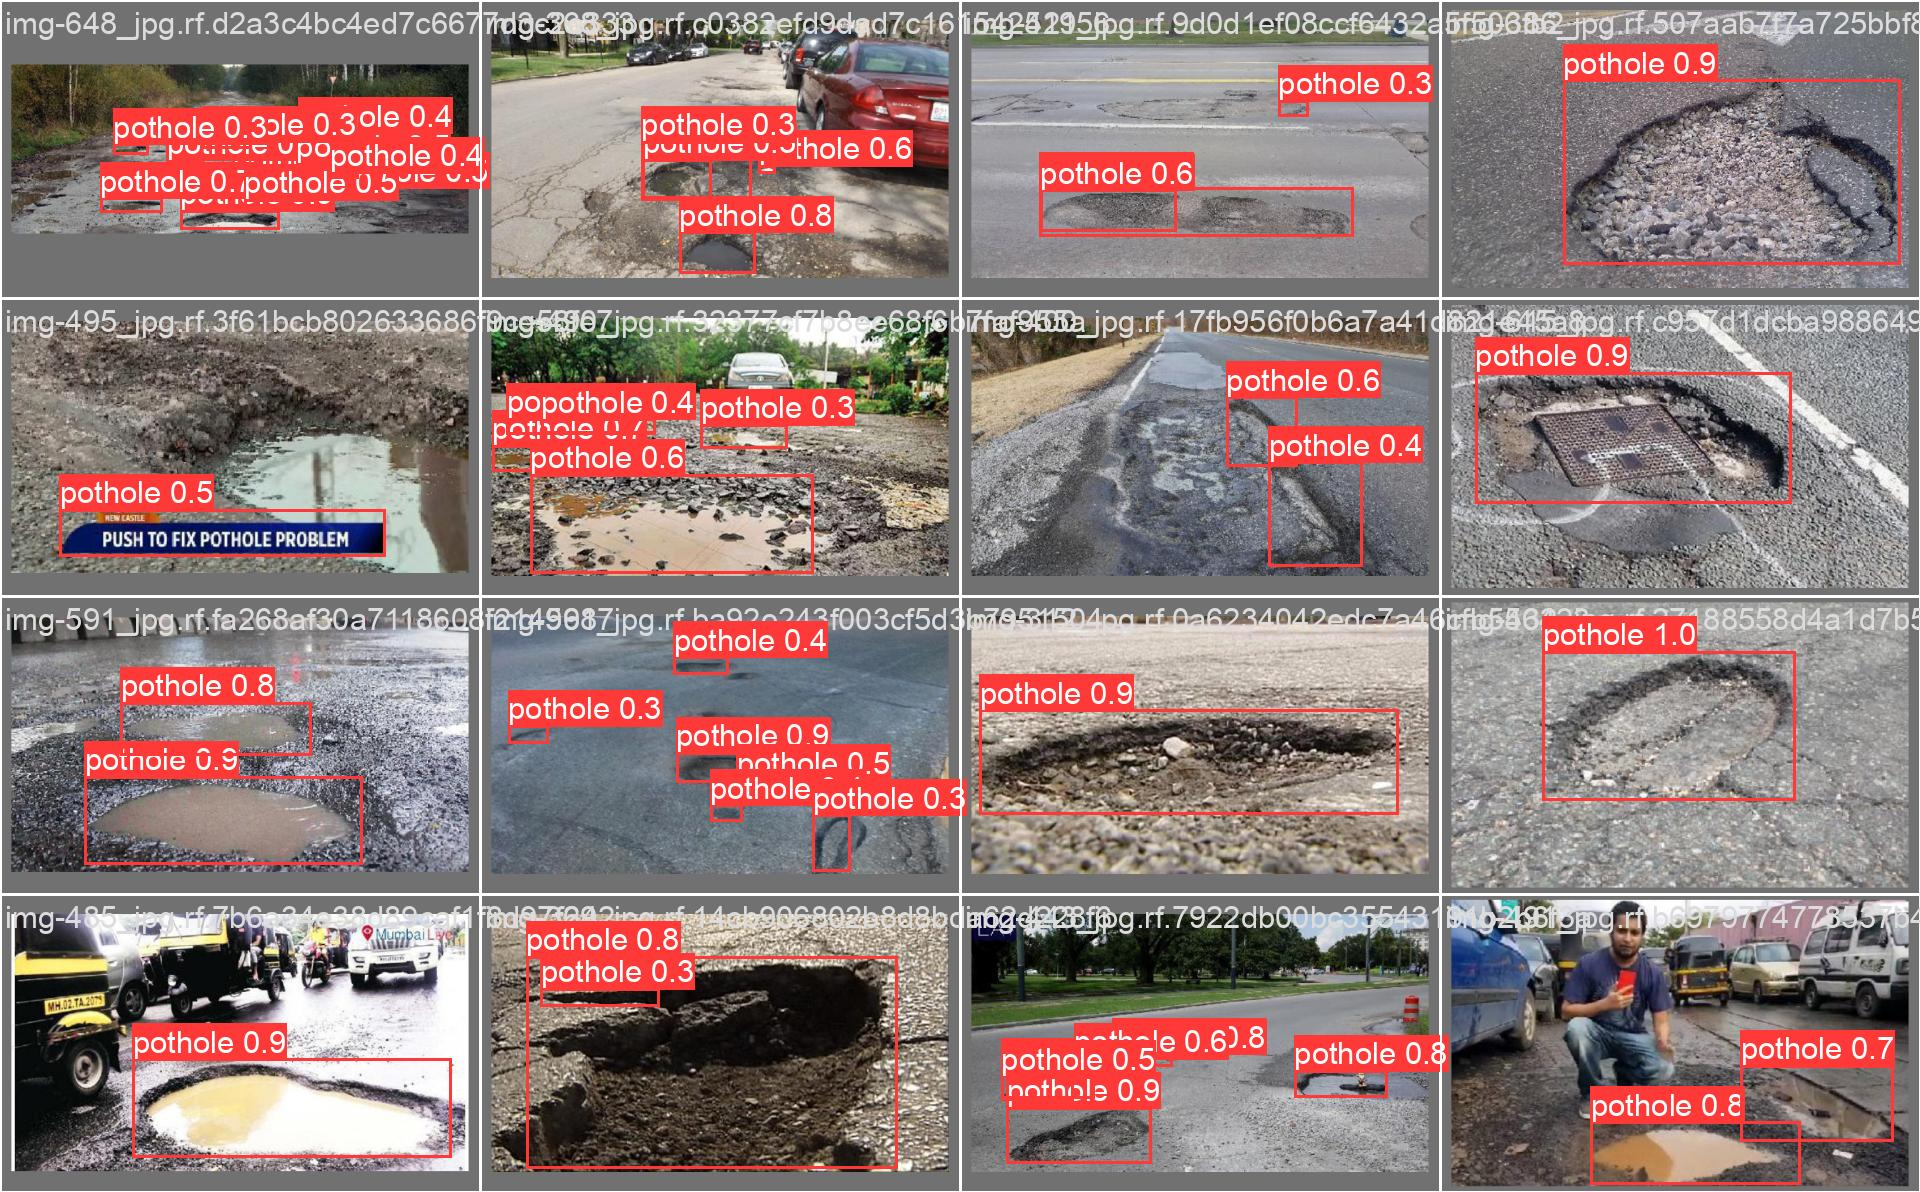

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch0_pred.jpg", width=1000)

# **Step 08: Validate Custom Model**
For validating the trained weight using the val_dual.py file and it result saved in the runs/val/yolov9_ppe_c_640_val

In [ ]:
# evaluate yolov9 models
!python val_dual.py --data 'Pothole-1/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --save-json --name yolov9_ppe_c_640_val

val_dual: data=Pothole-1/data.yaml, weights=['runs/train/yolov9-e-finetuning/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68547814 parameters, 0 gradients, 240.7 GFLOPs
val: Scanning /content/yolov9/Pothole-1/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 9/9 [00:13<00:00,  1.45s/it]
                   all        133        330      0.799      0.712      0.805      0.534
Speed: 0.2ms pre-process, 69.9ms inference, 7.0ms NMS per image 

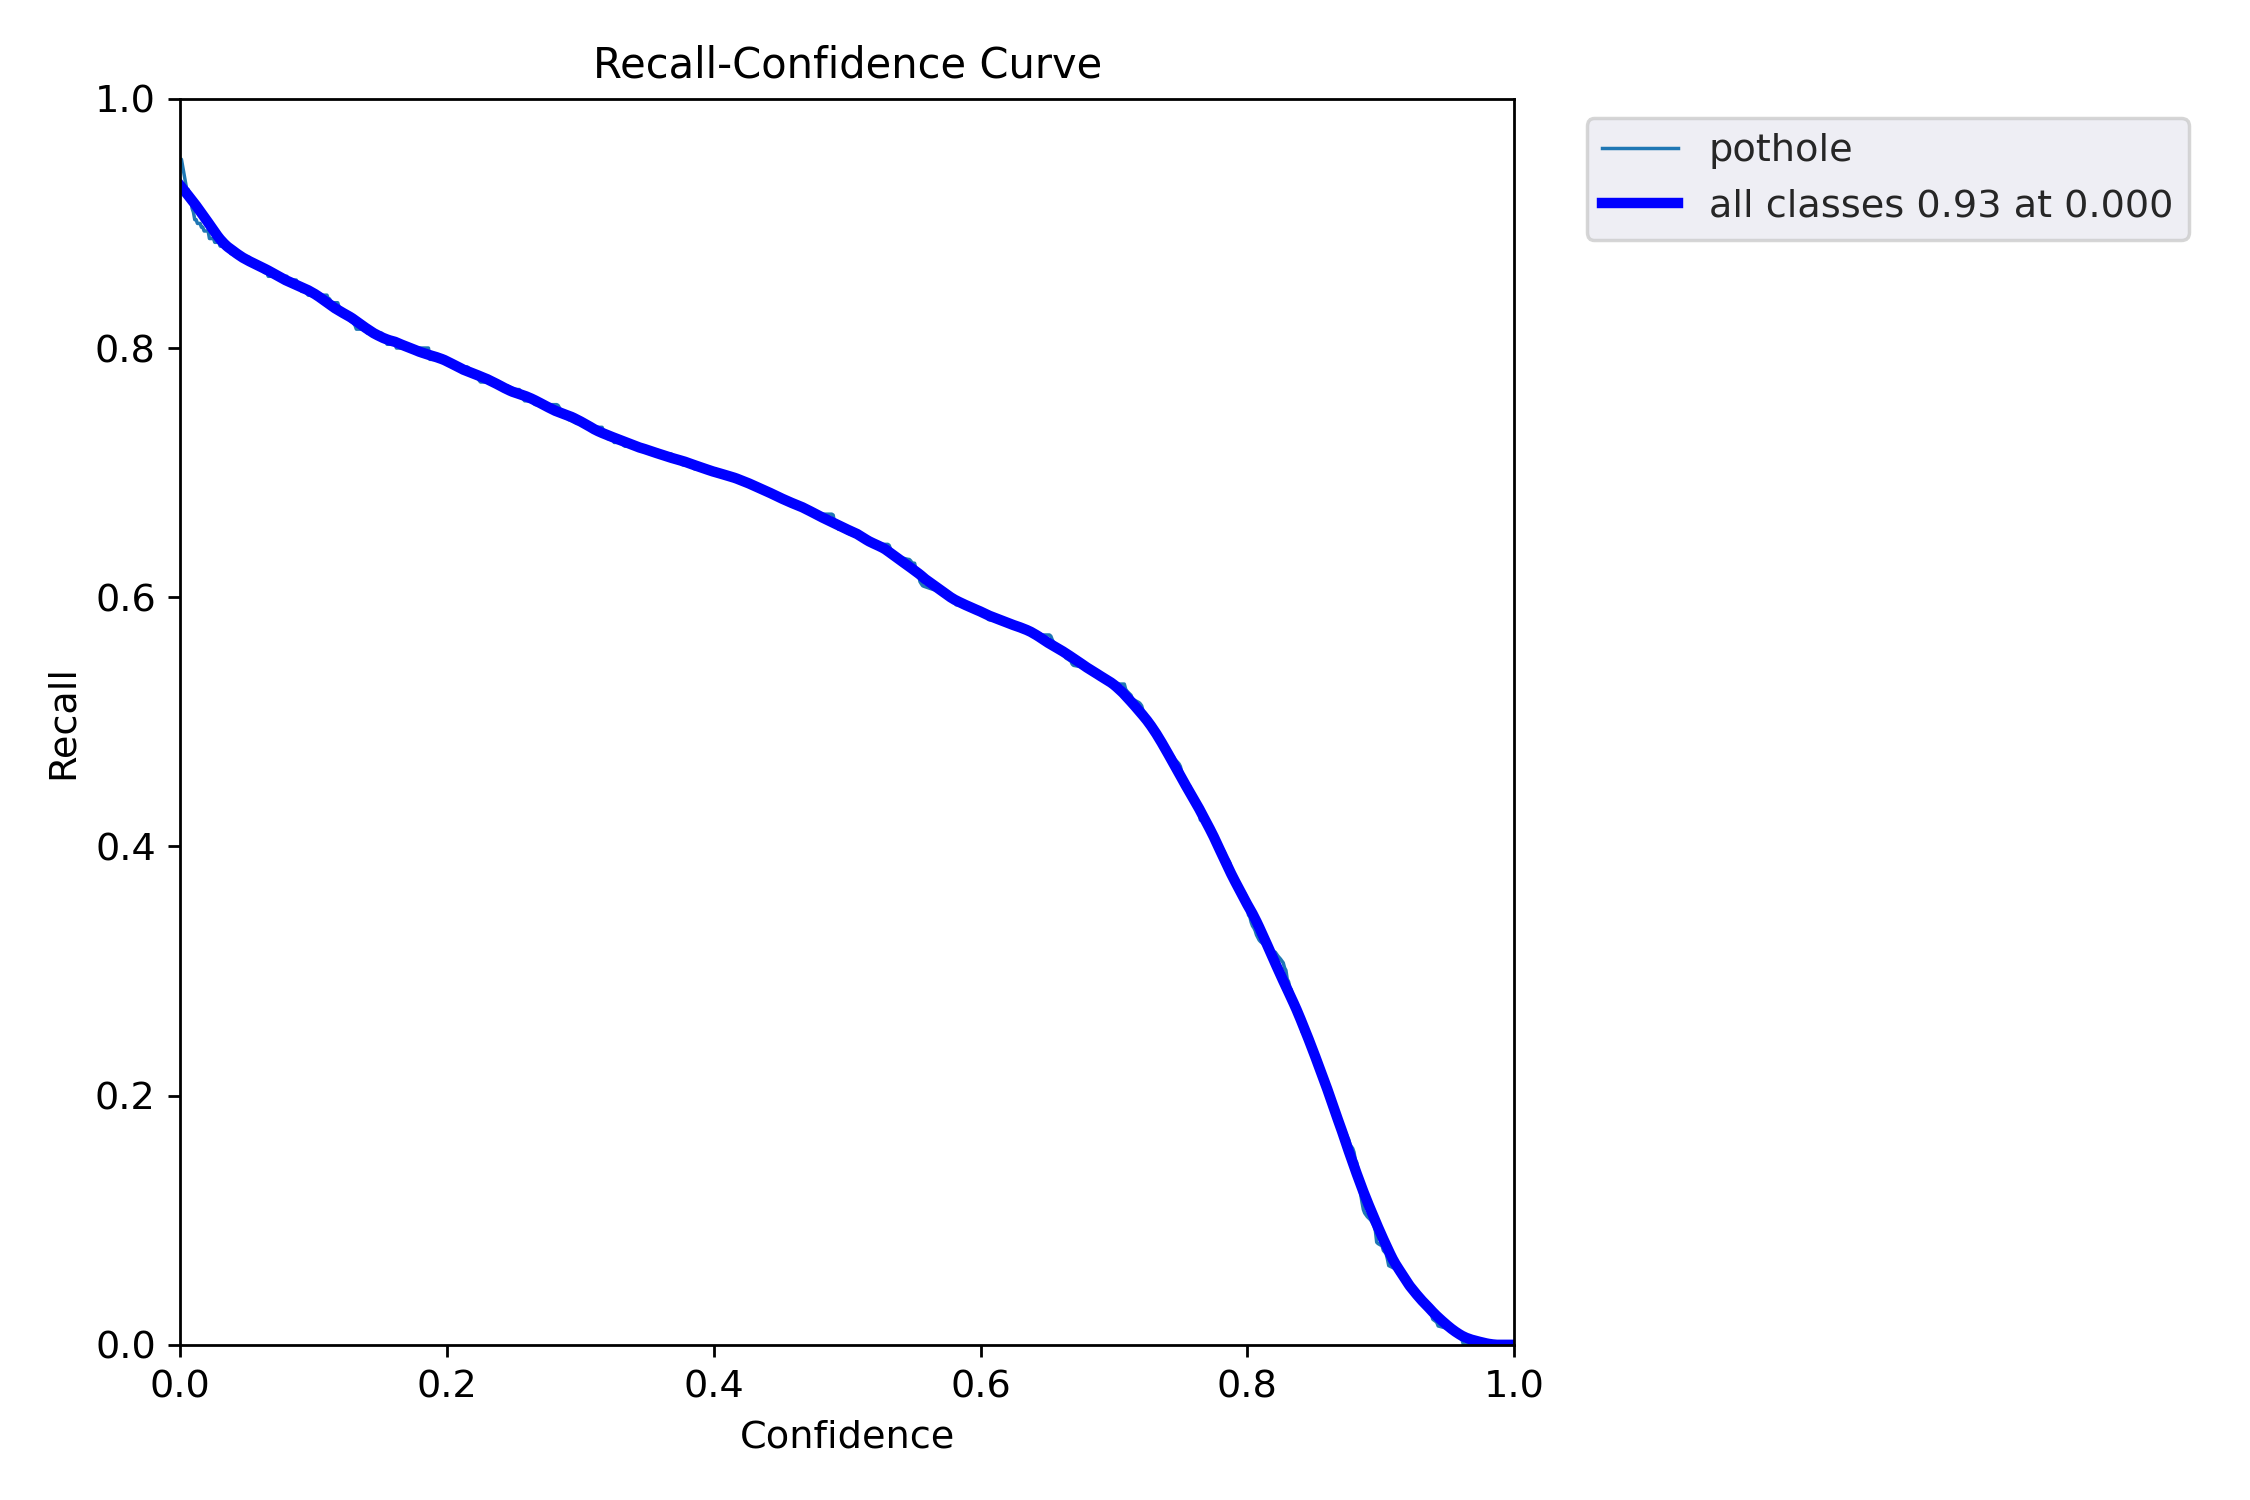

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/R_curve.png", width=1000)

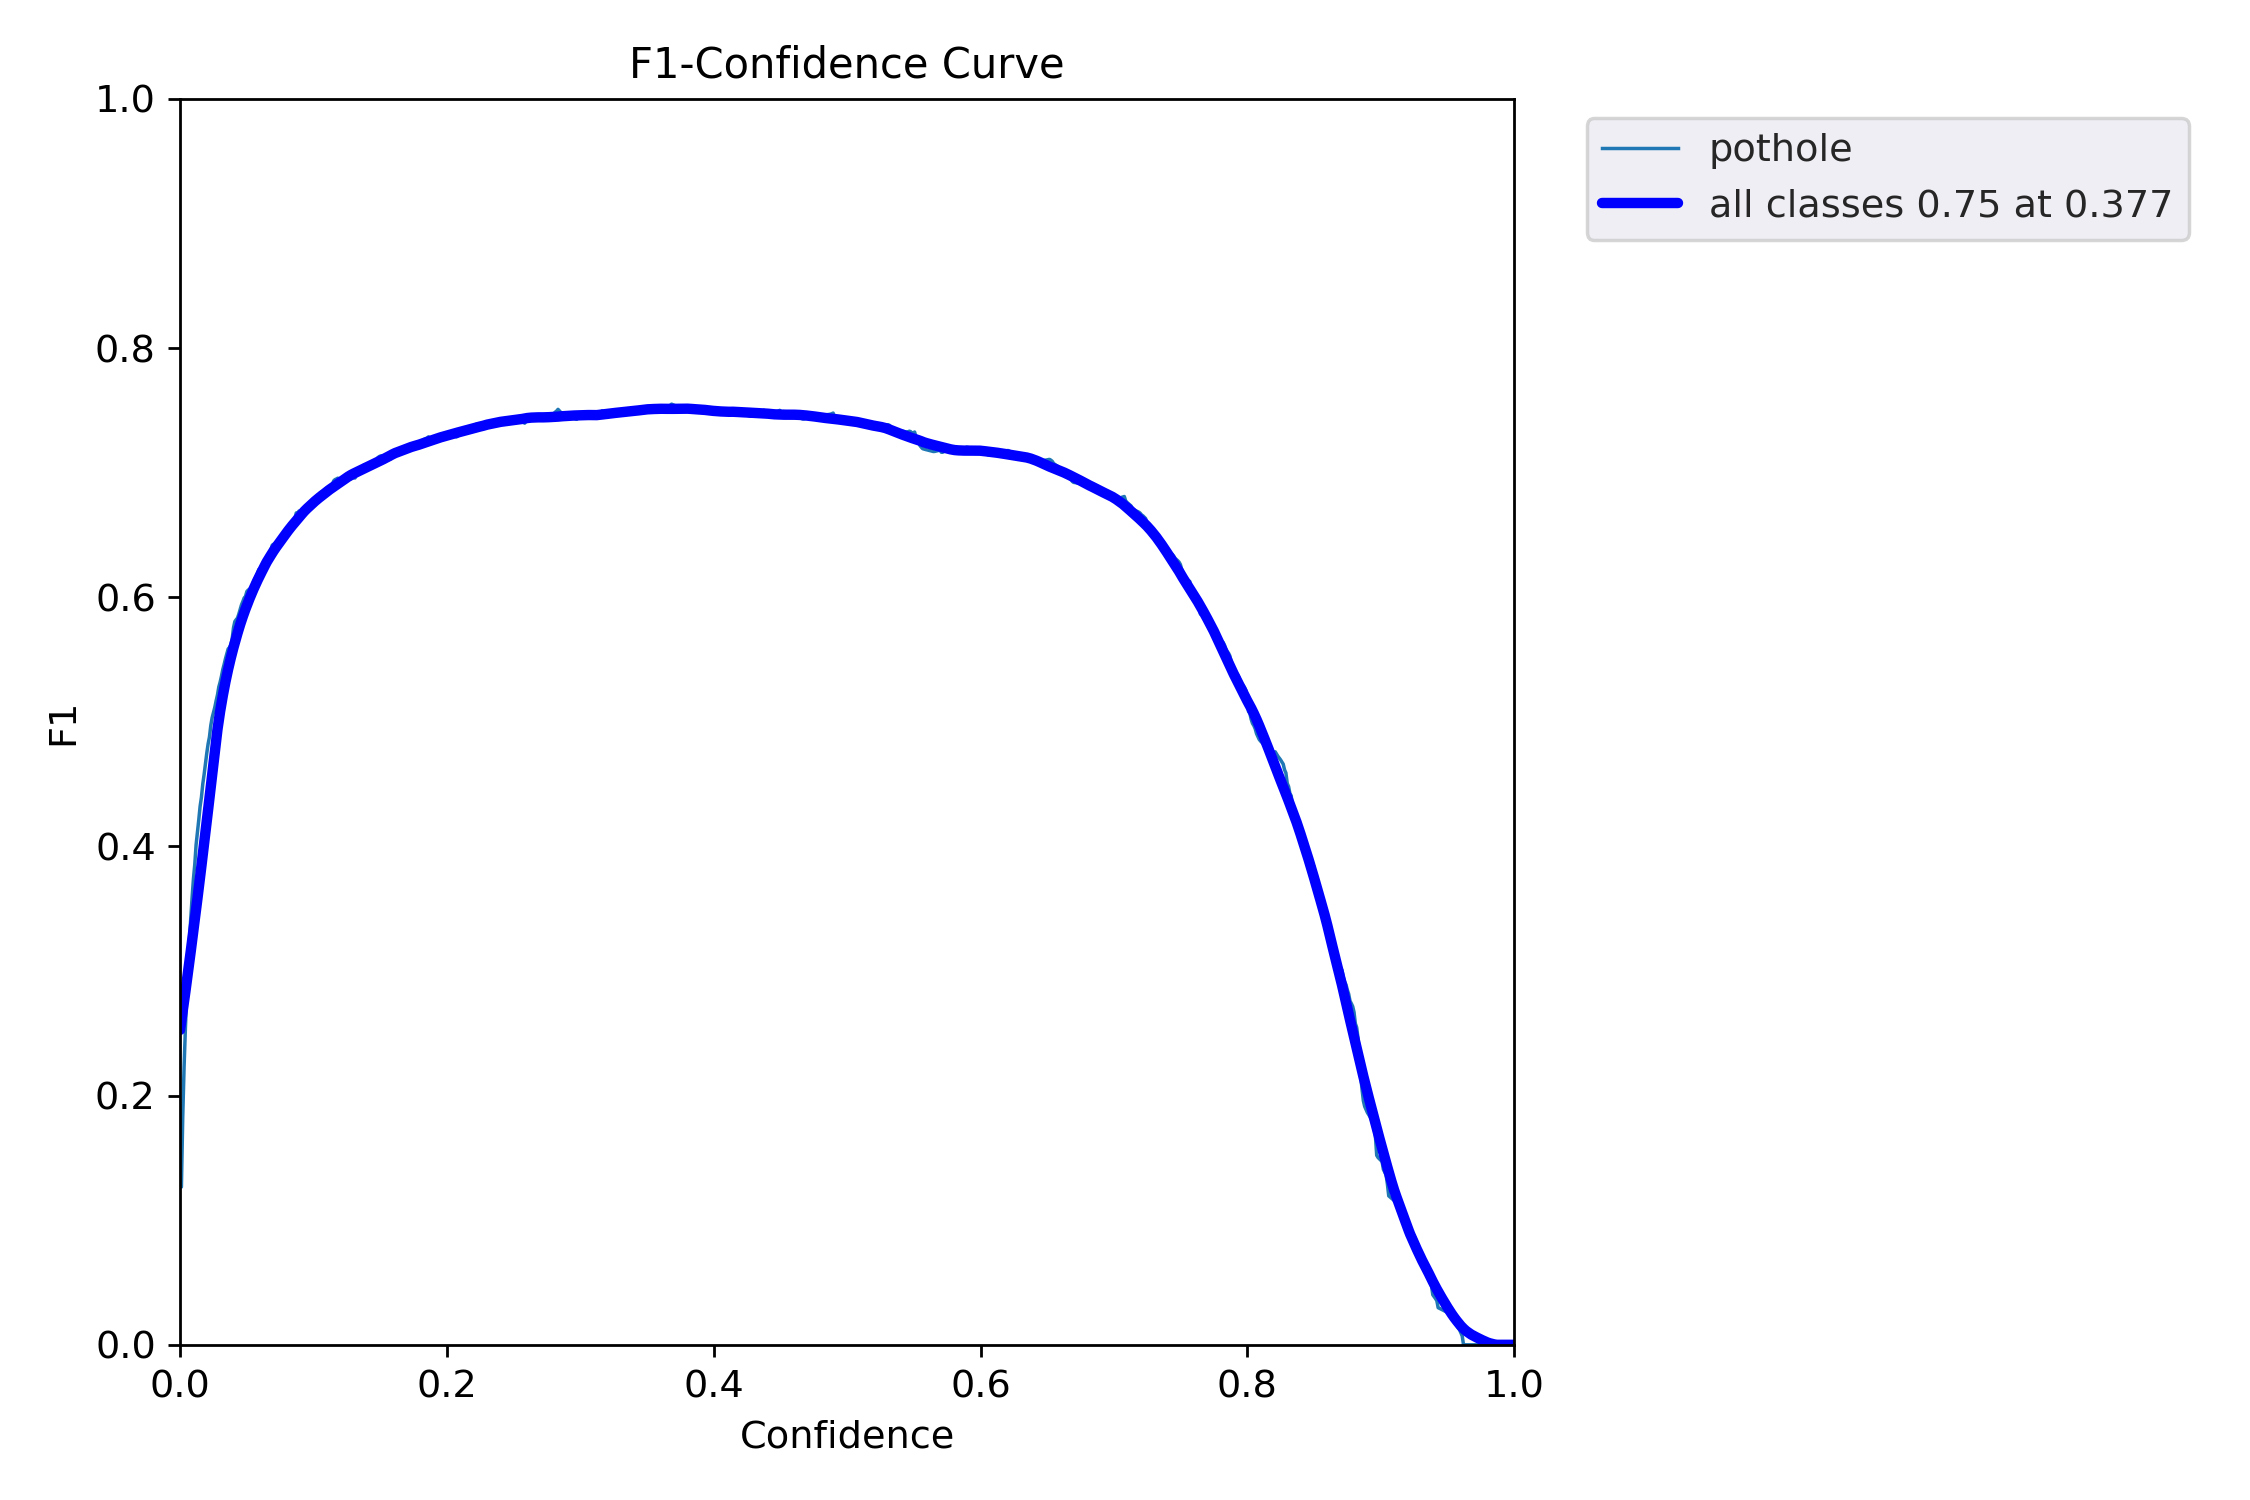

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/F1_curve.png", width=1000)

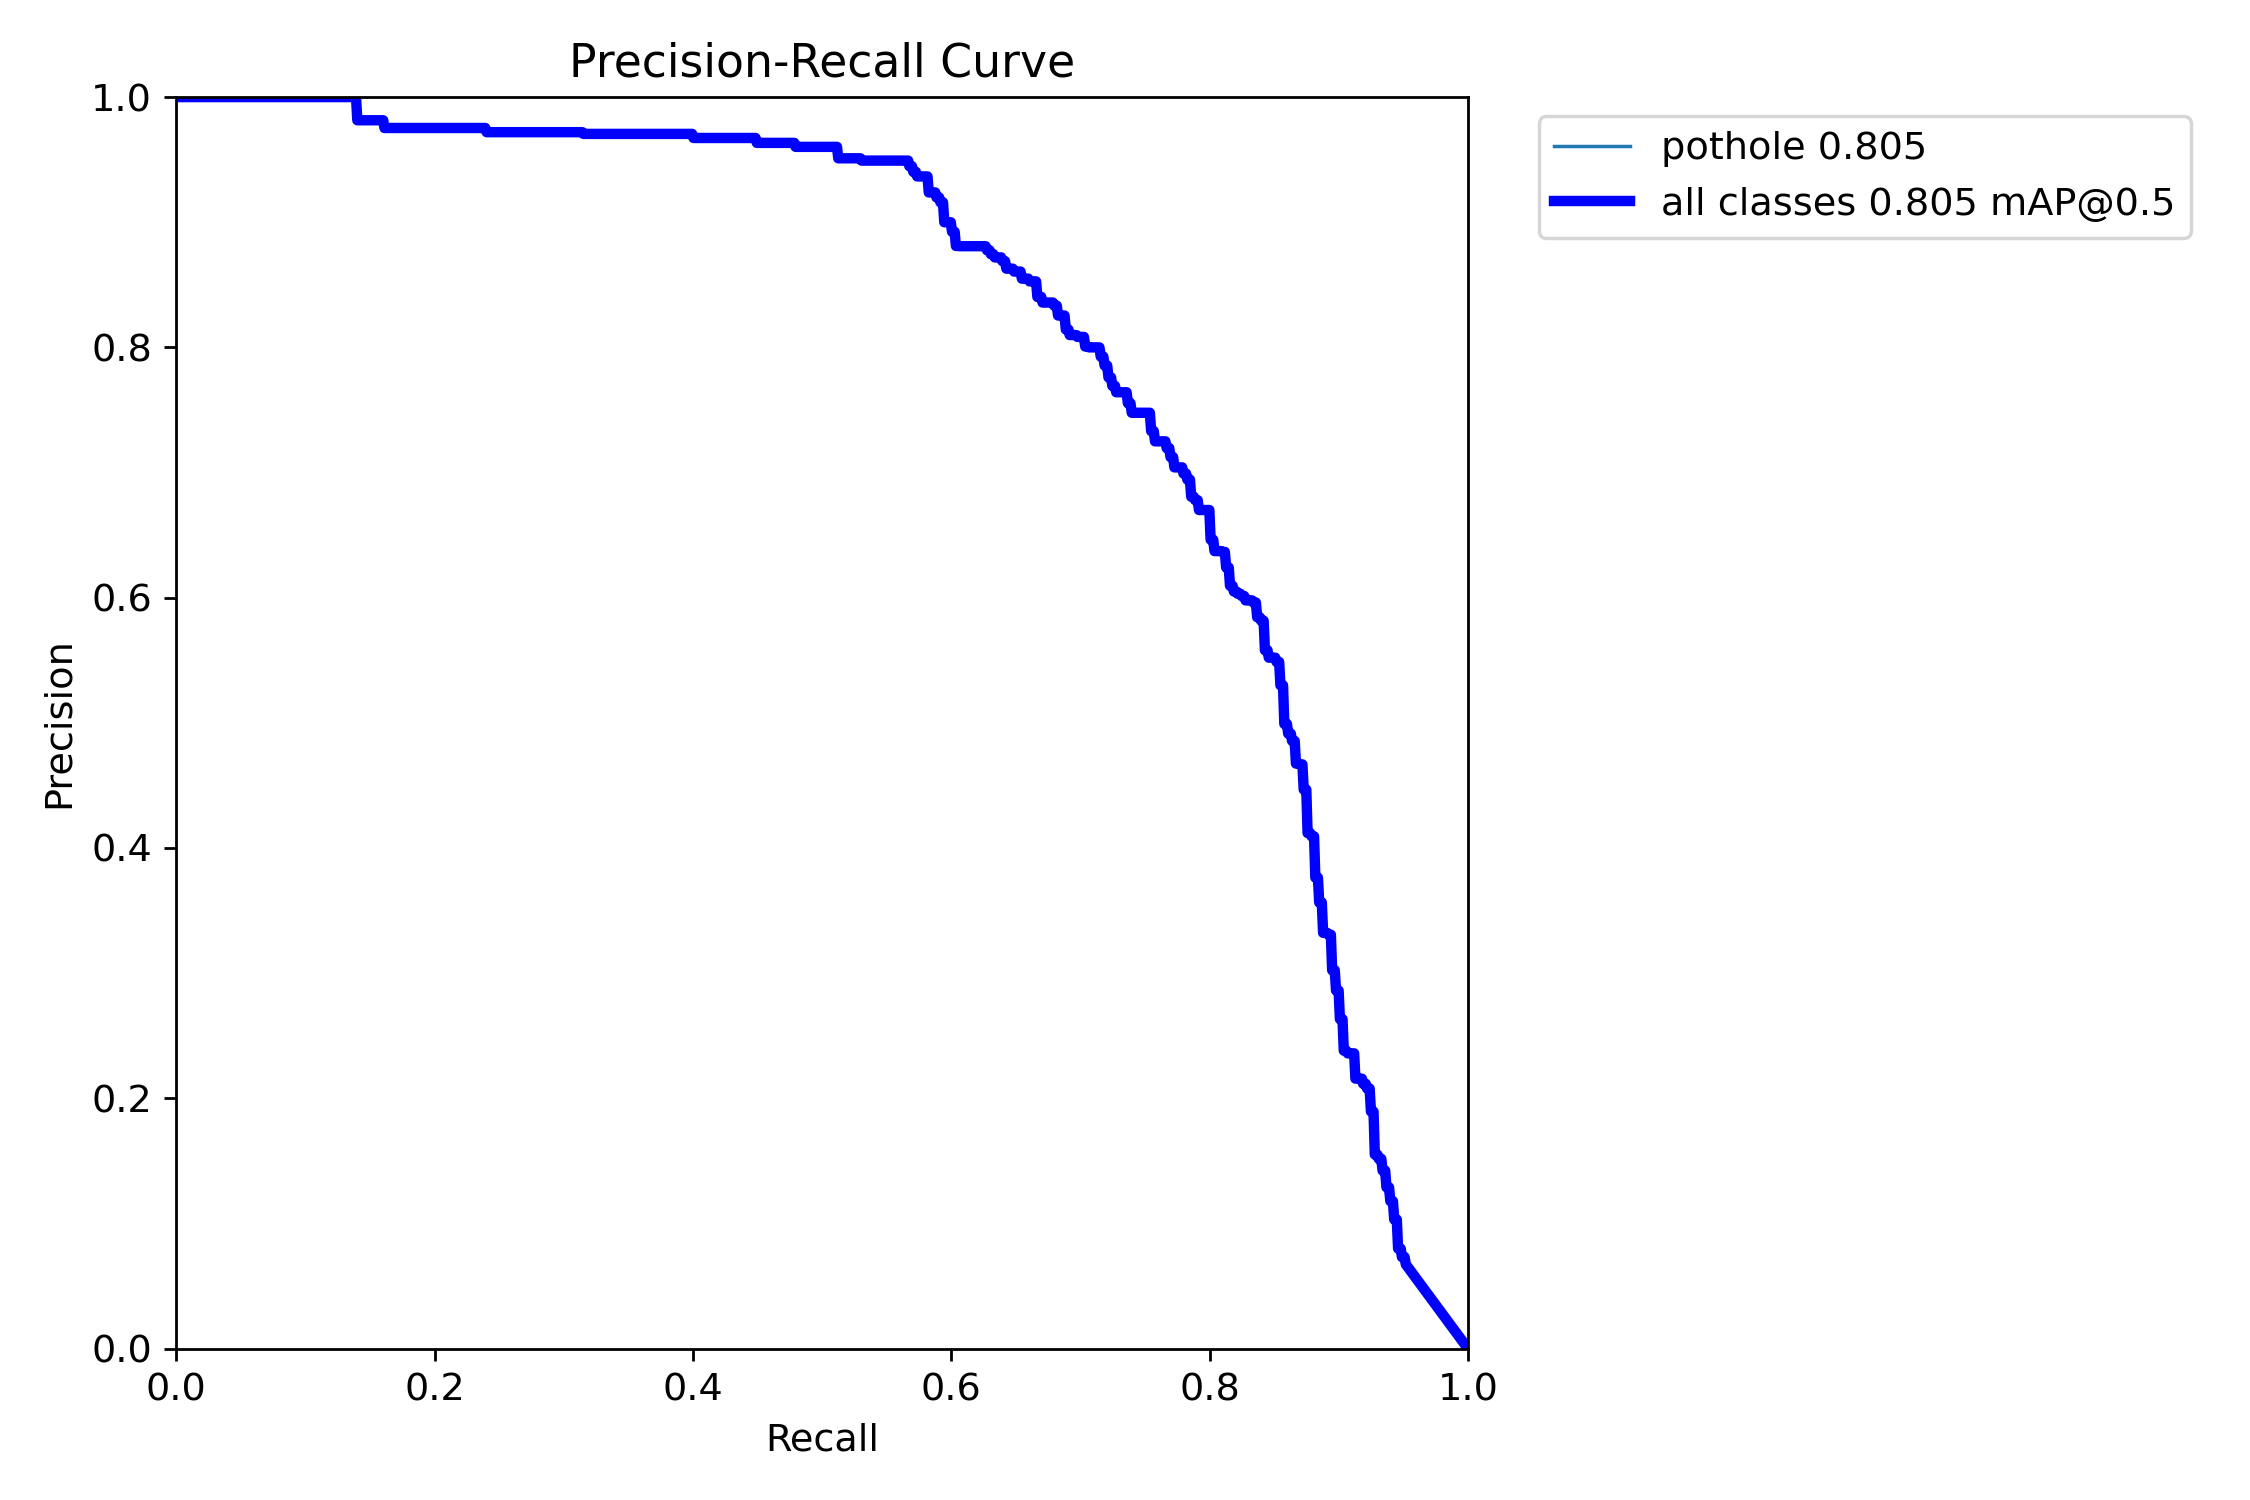

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/PR_curve.png", width=1000)

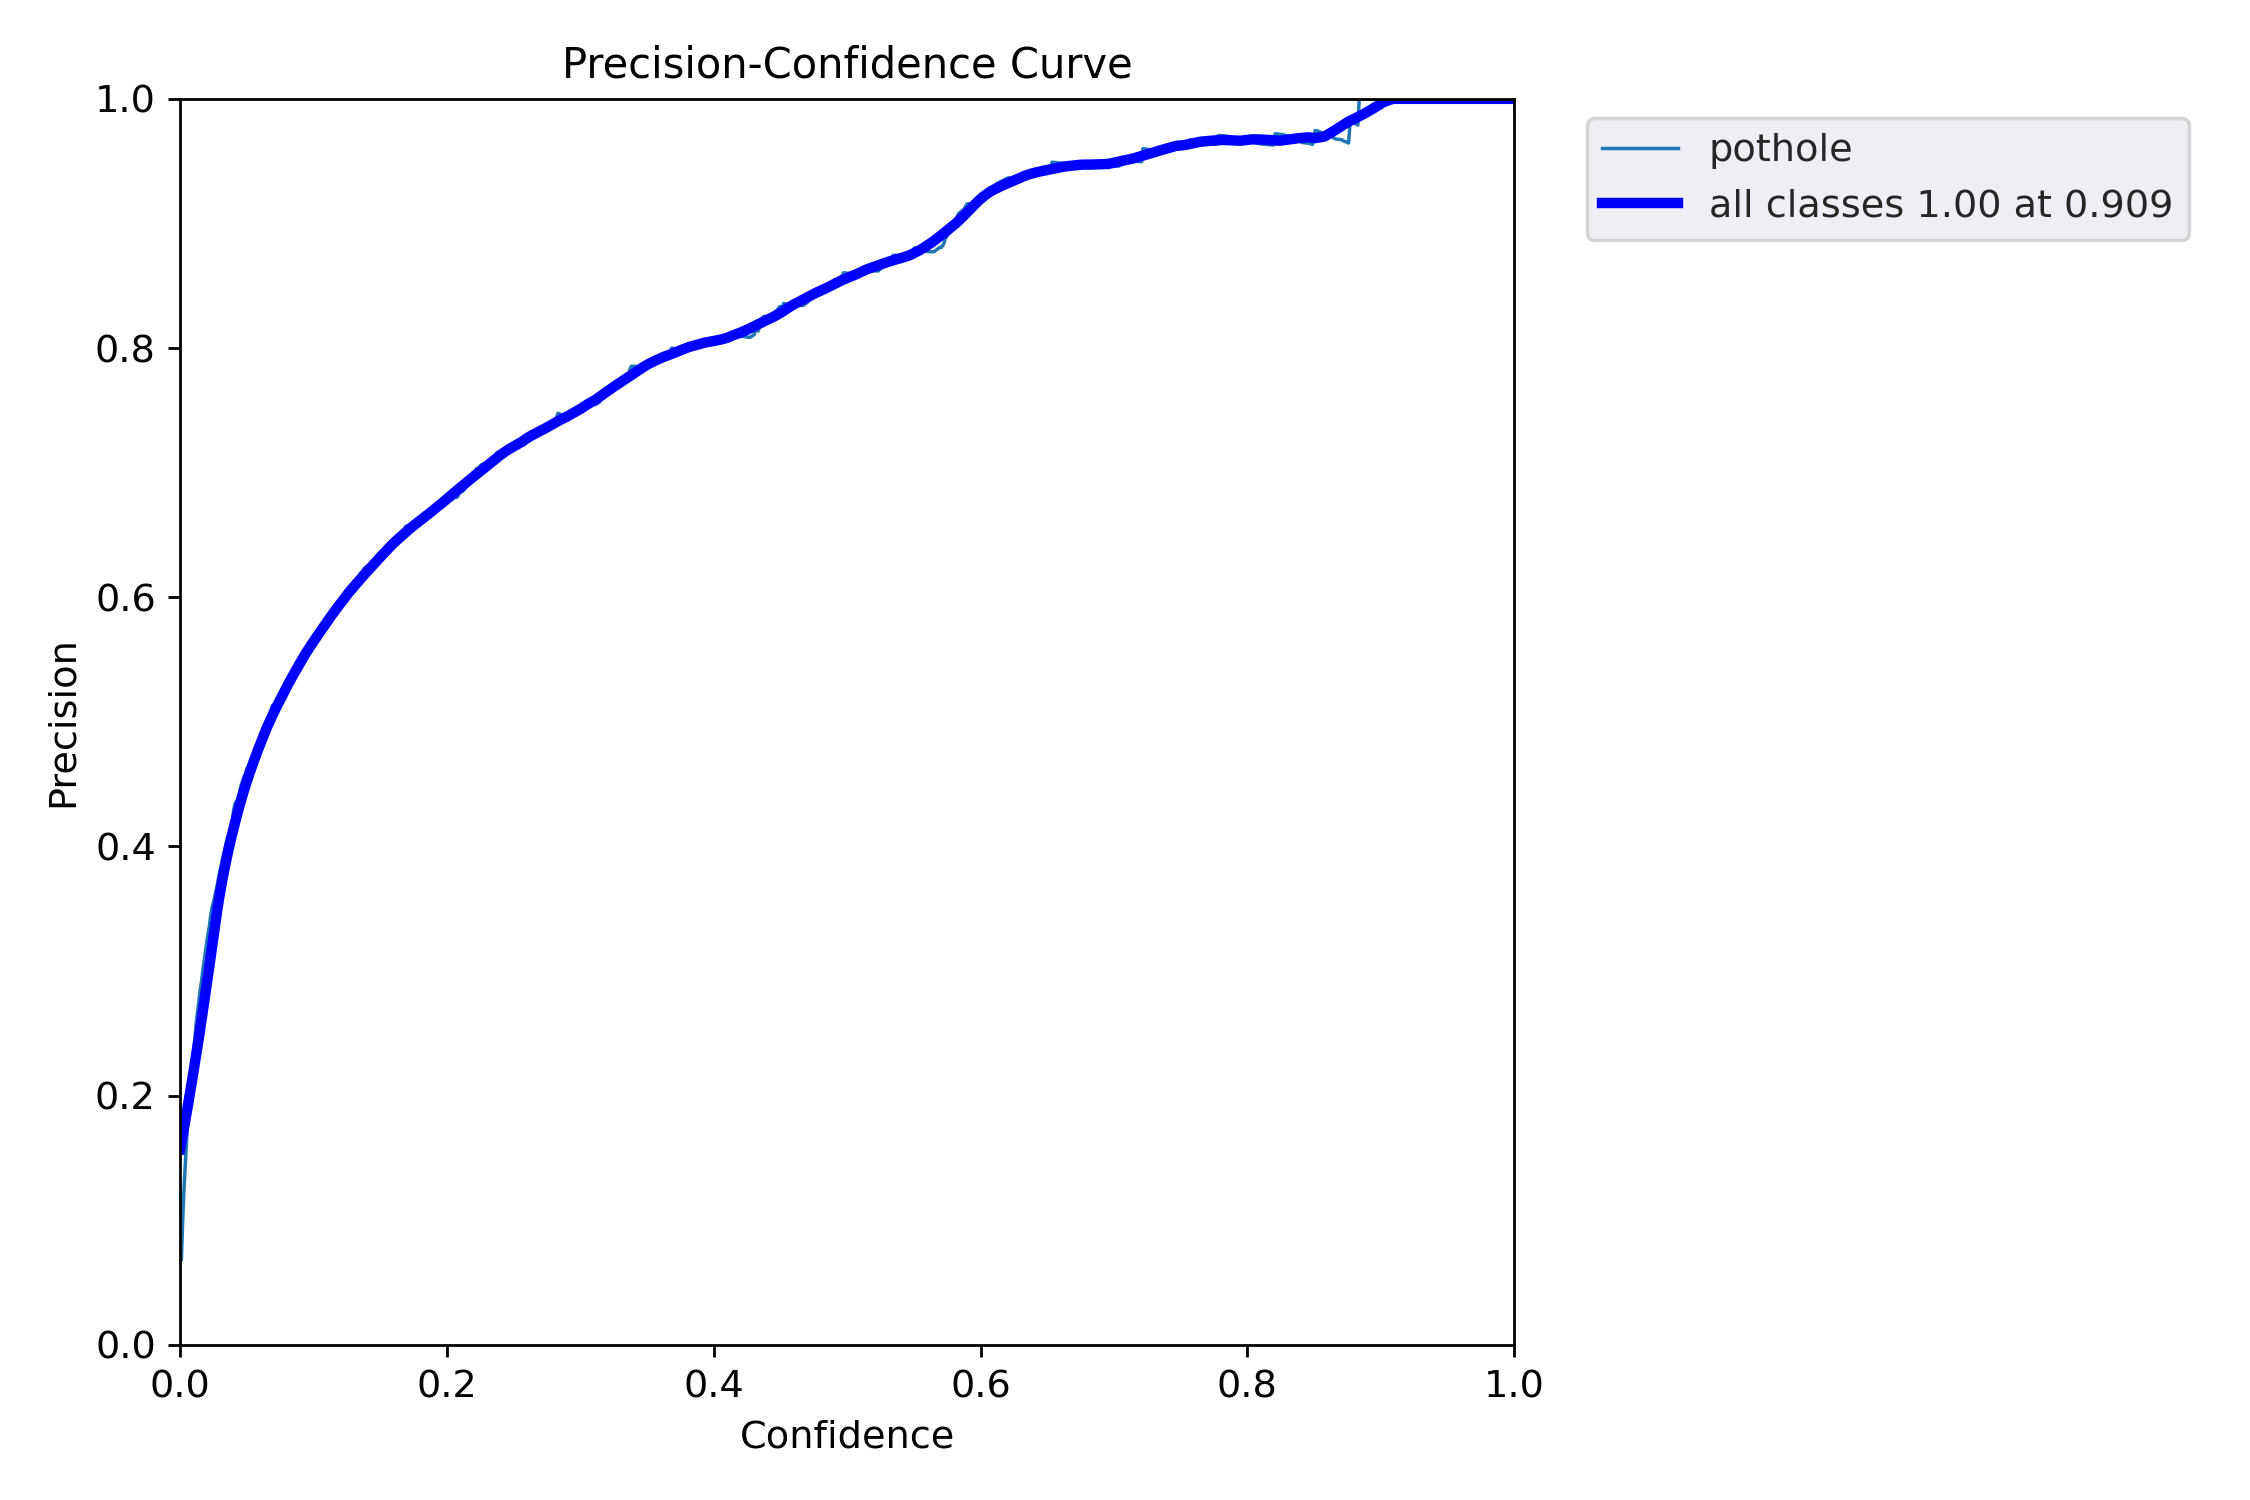

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/P_curve.png", width=1000)

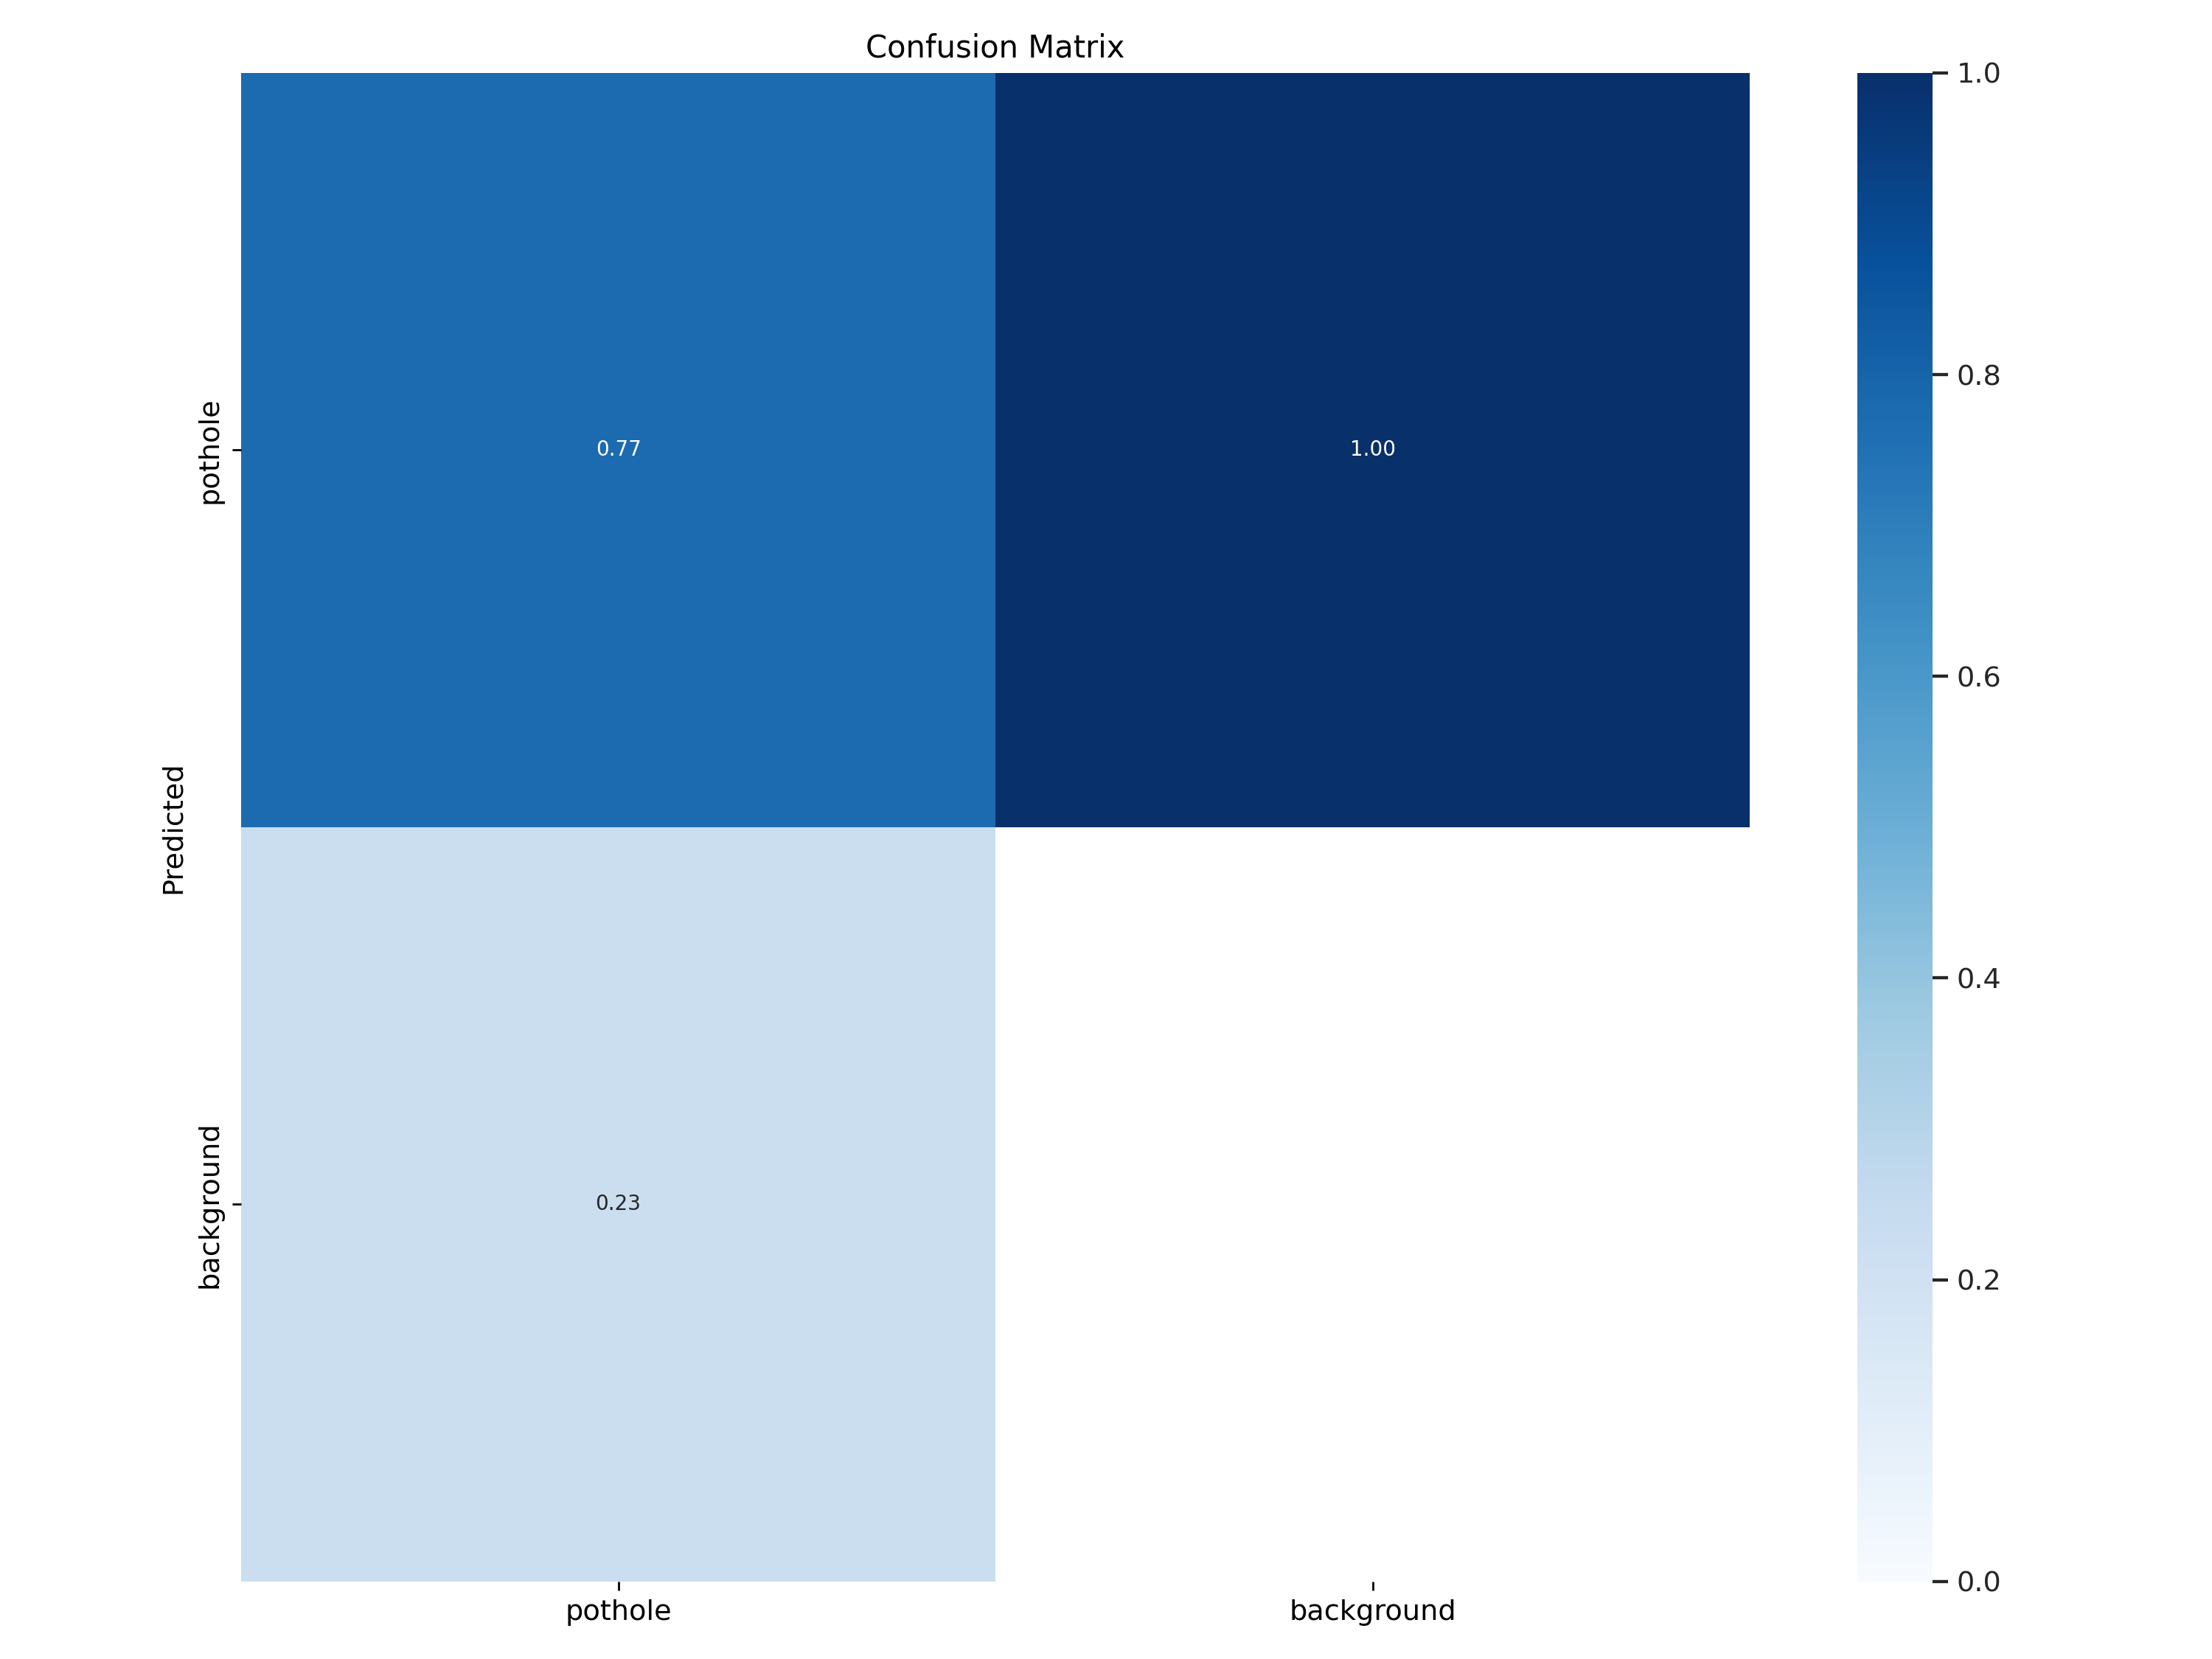

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/confusion_matrix.png", width=1000)

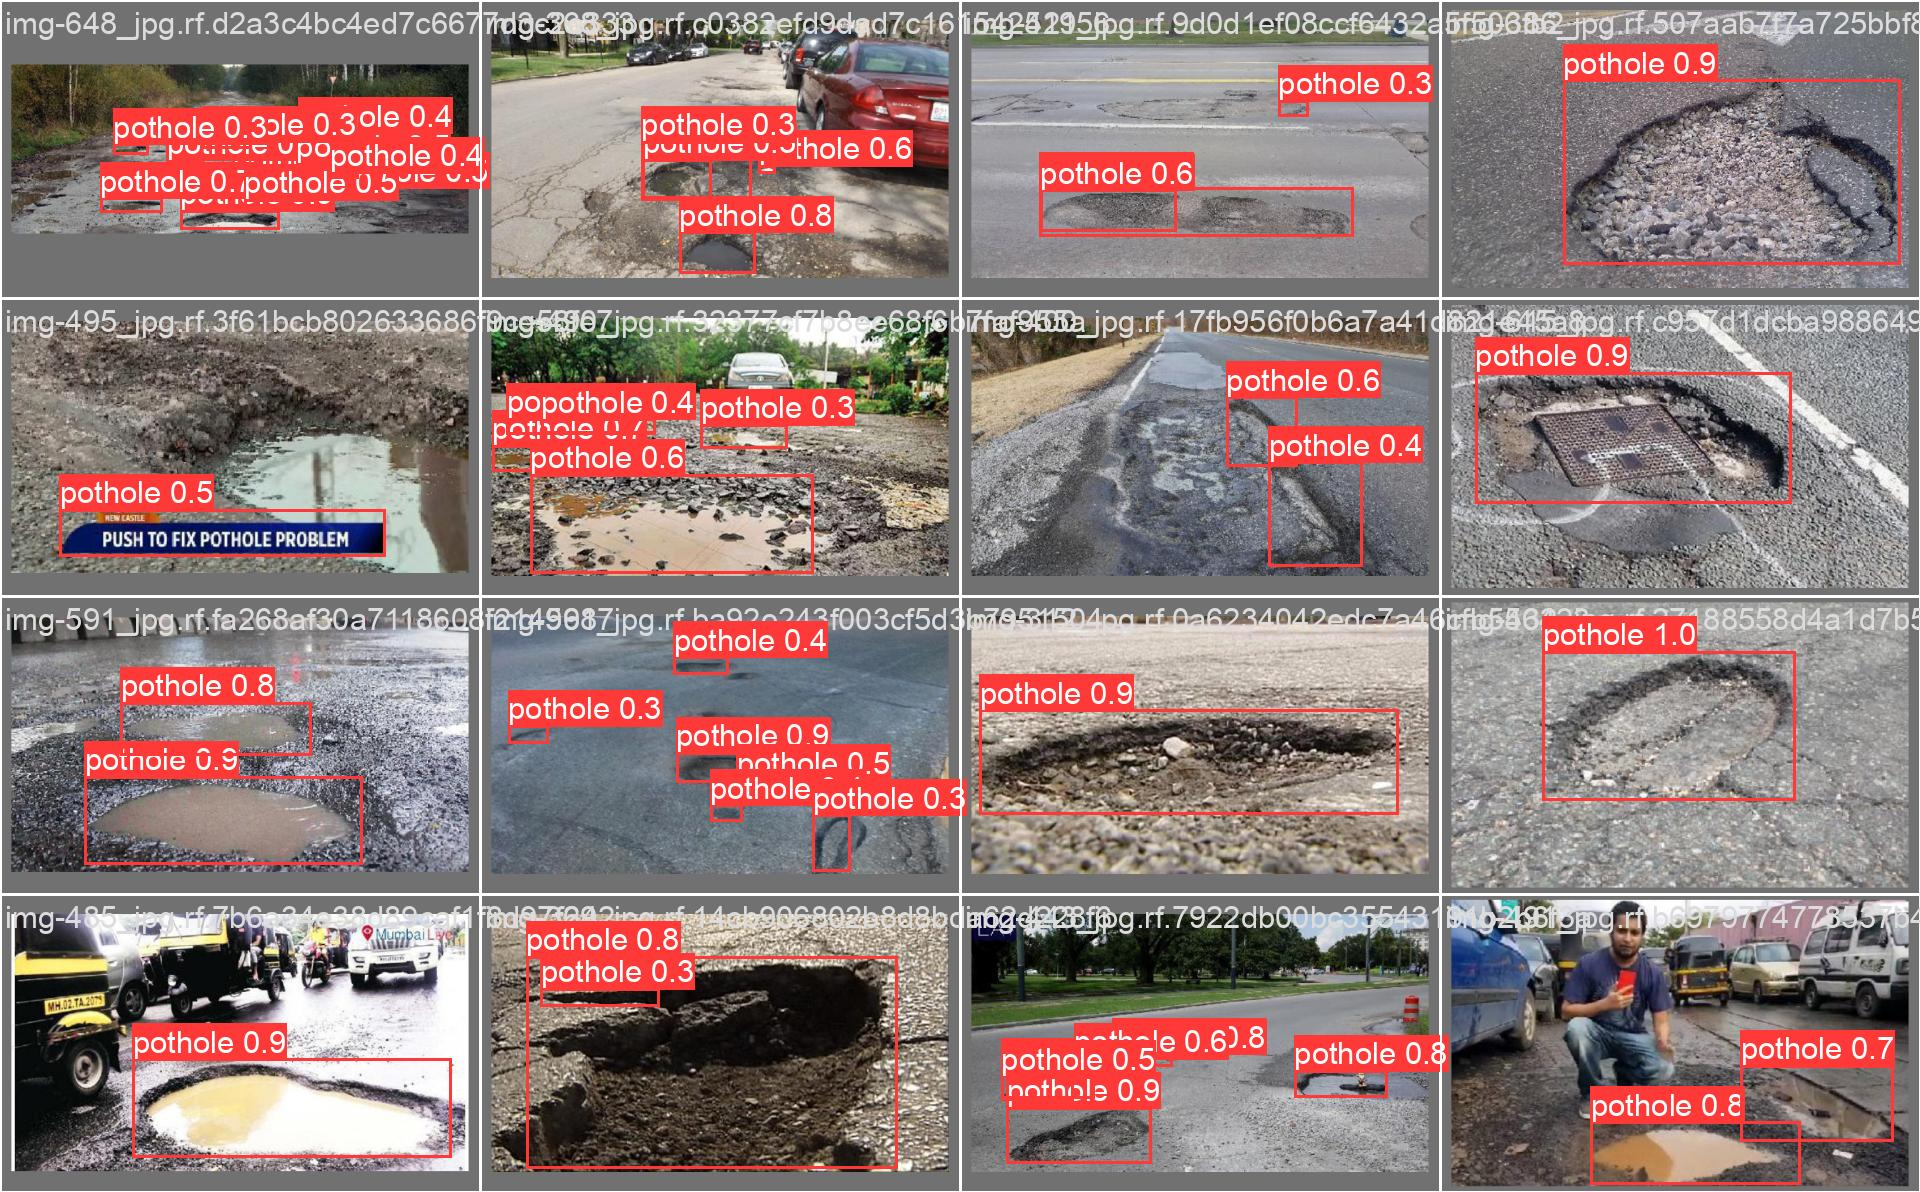

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch0_pred.jpg", width=1000)

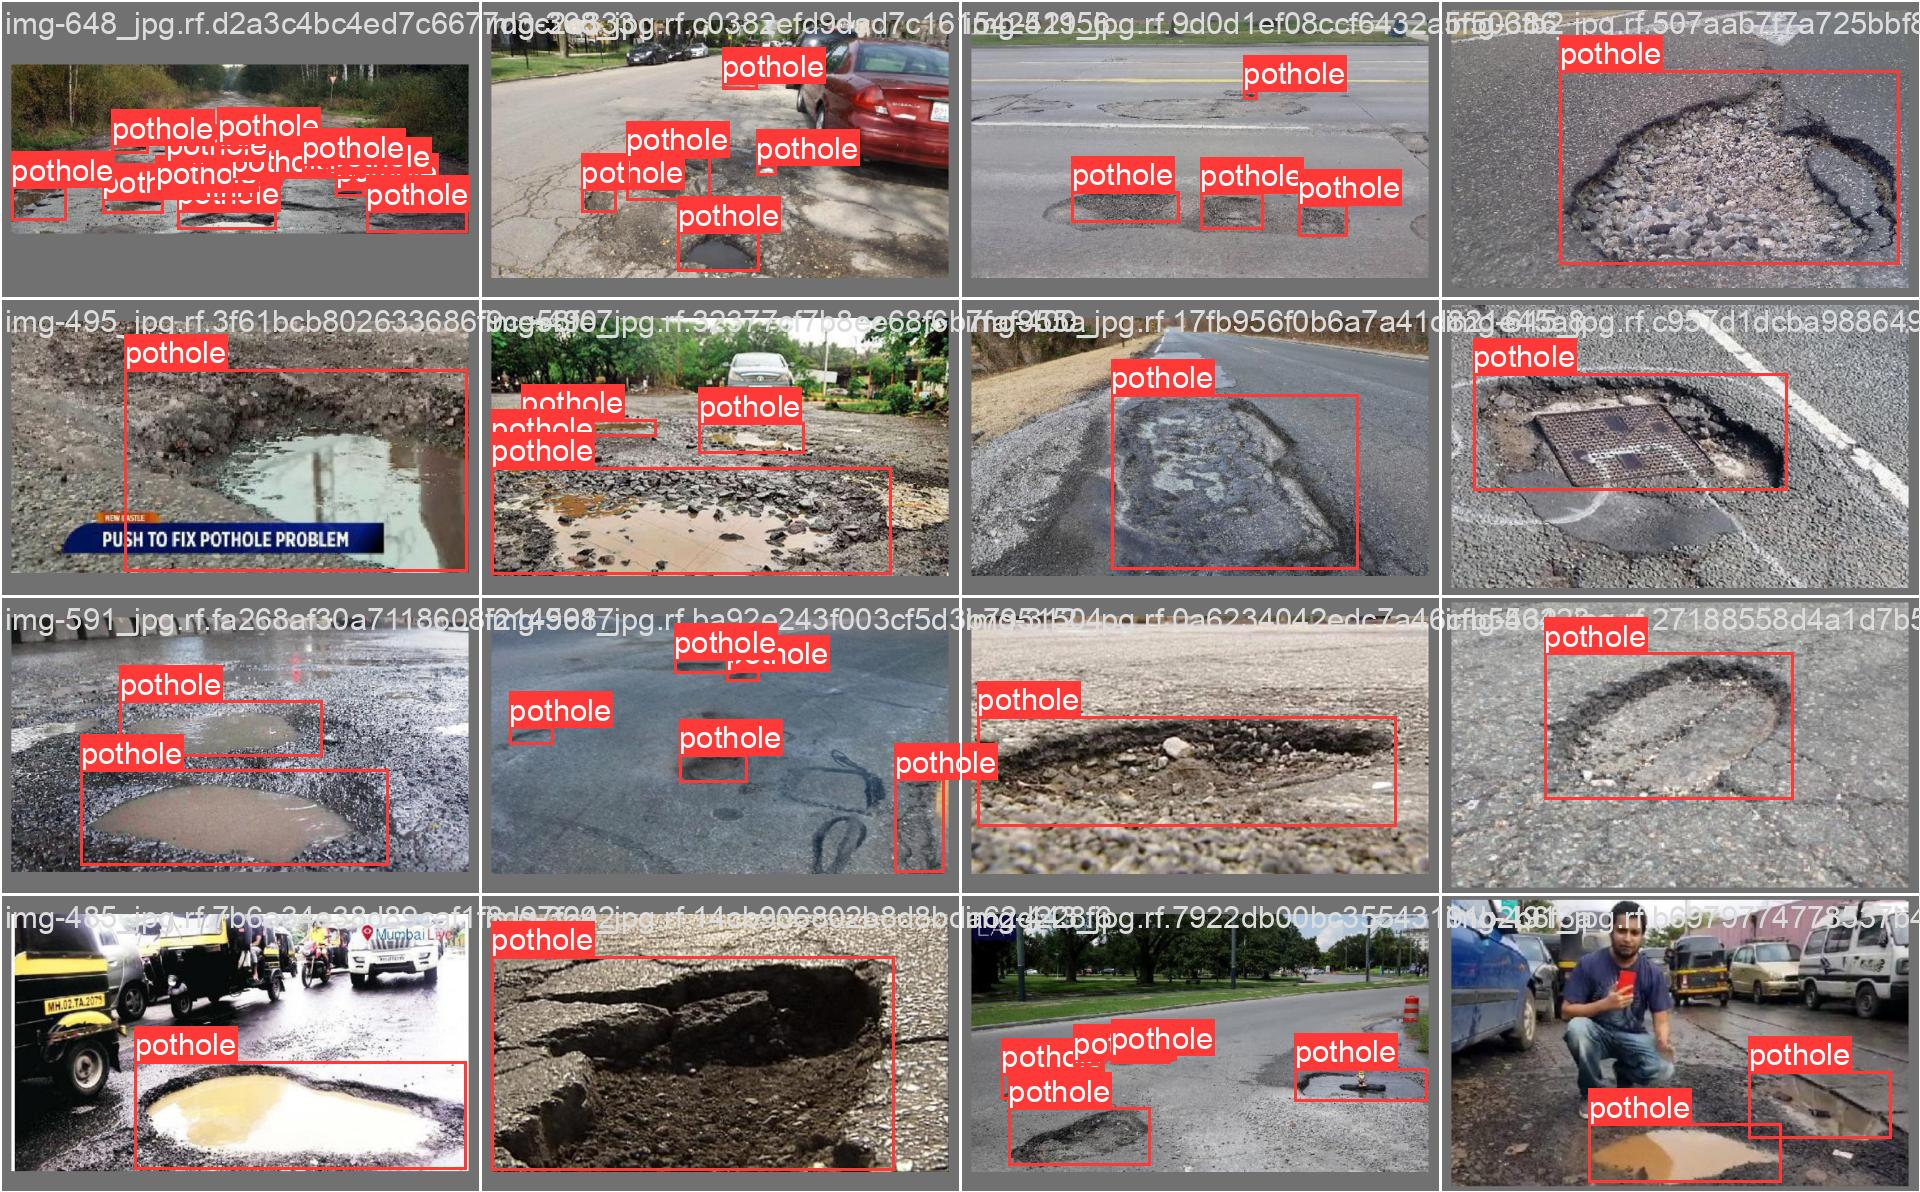

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch0_labels.jpg", width=1000)

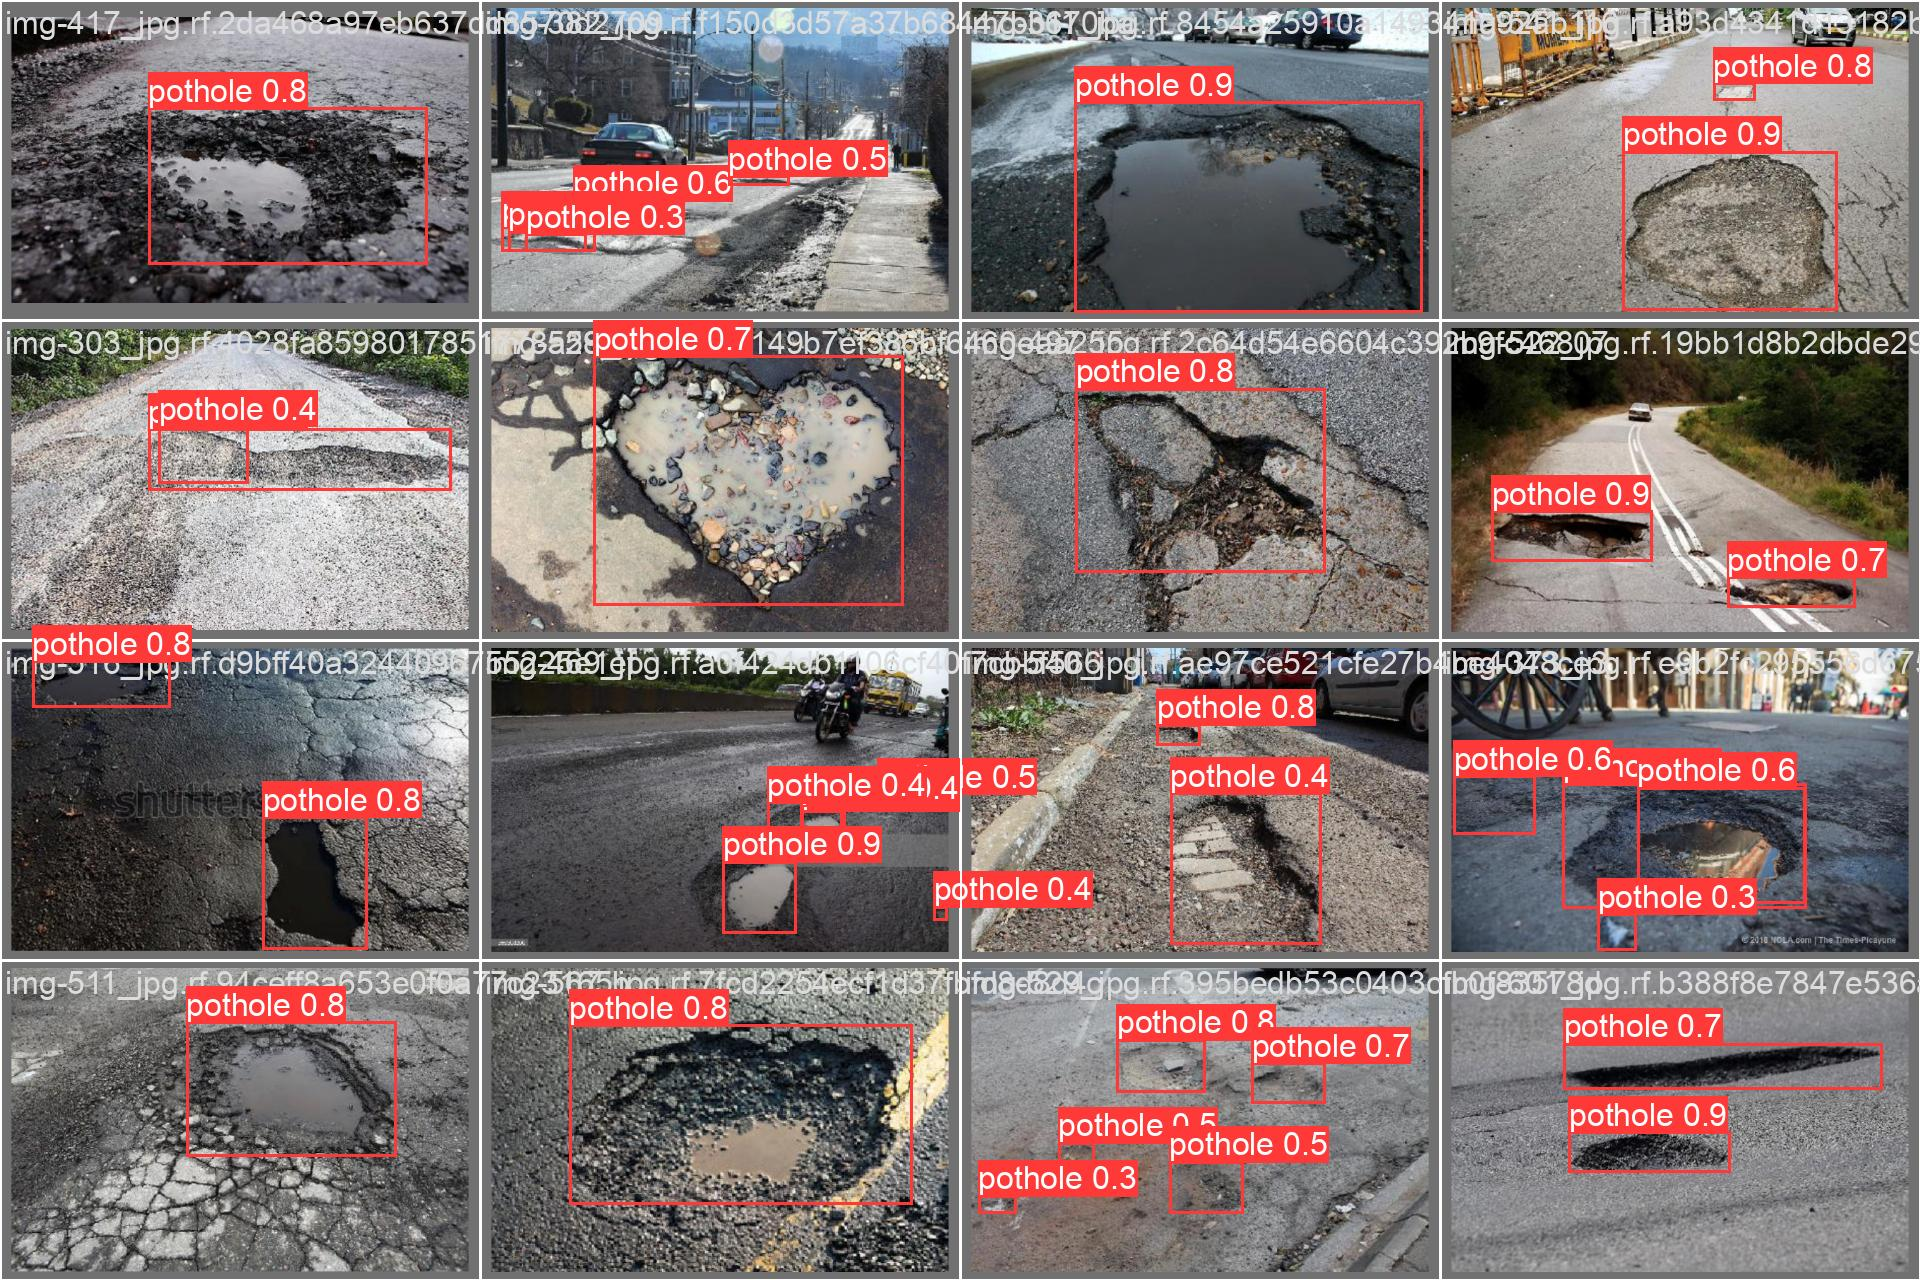

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch1_pred.jpg", width=1000)

In [ ]:
!gdown https://drive.google.com/drive/home

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/home
To: /content/yolov9/home
668kB [00:00, 10.8MB/s]


# **Step 09: Inference on Image***

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'Pothole-1/valid/images/img-104_jpg.rf.687b8858a9a79e92ea4b11024eafee62.jpg' --img 640 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_c_ppe_640_detect

python3: can't open file '/content/detect_dual.py': [Errno 2] No such file or directory


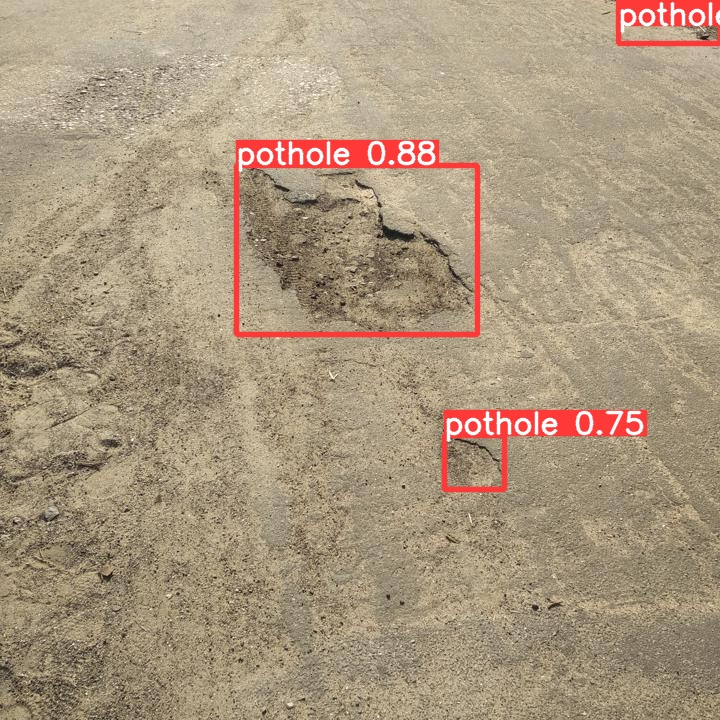

In [ ]:
Image(filename=f"{HOME}/runs/detect/yolov9_c_ppe_640_detect/img-104_jpg.rf.687b8858a9a79e92ea4b11024eafee62.jpg")

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'demo1.mp4' --img 640 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_ppe_640_detect

python3: can't open file '/content/detect_dual.py': [Errno 2] No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/yolov9_ppe_640_detect/demo1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

FileNotFoundError: [Errno 2] No such file or directory: '/content/result_compressed.mp4'